In [20]:
#import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from PIL import Image

from collections import Counter
from tqdm import tqdm
import random

In [169]:
image_path = []
bbox = []
with open('/Users/handh/dev/workspace/python/lake_meterials_deeplearning_model/dataset/digital_digit2/anno_digit.txt' ,'r') as f:
    for row in f.readlines():
        col = row.split()
        image_path.append(os.path.join('/Users/handh/dev/workspace/python/lake_meterials_deeplearning_model/dataset/digital_digit2/', col[0]))
        bbox.append(col[1:])

In [170]:
def _get_annotation(objects, orig_shape):
    w, h = orig_shape

    boxes = []
    labels = []

    for obj in objects:
        v = obj.split(',')
        name_idx = float(v[4])
        xmin = float(v[0]) / w
        ymin = float(v[1]) / h
        xmax = float(v[2]) / w
        ymax = float(v[3]) / h
        boxes.append([xmin, ymin, xmax, ymax])

        labels.append(name_idx + 1)

    return np.array(boxes, dtype=np.float32), np.array(labels, dtype=np.int64)

In [239]:
def random_zoomin(img, boxes, ratio = 1.0):
    # radio = random.uniform(0.05, 0.95)
    w, h = img.size
    # print(w,h)
    boxes = boxes * [w, h, w, h]
    img = np.array(img)
    
    box_x1 = min(boxes[:, 0])
    box_y1 = min(boxes[:, 1])
    box_x2 = max(boxes[:, 2])
    box_y2 = max(boxes[:, 3])
    
    box_w = box_x2 - box_x1
    box_h = box_y2 - box_y1
    
    if box_w > box_h:
        ratio = box_w / w
    else:
        ratio = box_h / h
        
    ratio = random.uniform(ratio, max(ratio, 0.8))
    
    new_w = (w * ratio)
    new_img_x1 = random.uniform(max(box_x2 - new_w, 0), box_x1)
    new_img_x2 = new_img_x1 + new_w
    
    new_h = (h * ratio)
    new_img_y1 = random.uniform(max(box_y2 - new_h, 0), box_y1)
    new_img_y2 = new_img_y1 + new_h
    
    new_boxes = boxes - [new_img_x1, new_img_y1, new_img_x1, new_img_y1]
    new_img_y1, new_img_y2, new_img_x1, new_img_x2 = int(new_img_y1), int(new_img_y2), int(new_img_x1), int(new_img_x2)

    
    new_img = img[new_img_y1:new_img_y2, new_img_x1:new_img_x2, :]
    

    # cv_img =cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
    
    # for box in new_boxes:
    #     print(box)
    #     box = box.astype(np.int)
    #     output_img = cv2.rectangle(cv_img, (box[0], box[1]), (box[2], box[3]), (0,0,255), 2)
    # plt.figure(figsize=(10, 10))
    # plt.imshow(output_img)
    # plt.show()

    new_boxes = new_boxes / [new_w, new_h, new_w, new_h]
    new_img = Image.fromarray(new_img)
    return new_img, new_boxes

In [240]:
idx = 0
img = Image.open(image_path[idx])
boxes, class_idx = _get_annotation(bbox[idx], img.size)
n, b = random_zoomin(img, boxes)

In [175]:
def padding(img, boxes, constant_values = 144, pad_type = 'constant'):
    img = np.array(img)
    h, w, _ = img.shape
    boxes = boxes * [w, h, w, h]
    gap = abs(w - h) // 2
    if w > h:
        reshape_img = np.pad(img, ((gap, gap), (0, 0), (0,0)), pad_type, constant_values=constant_values)
        # boxes = boxes + [0, gap, 0, gap]
        h = h + (gap*2)
    else:
        reshape_img = np.pad(img, ((0, 0), (gap, gap), (0,0)), pad_type, constant_values=constant_values)
        # boxes = boxes + [gap, 0, gap, 0]
        w = w + (gap*2)

    # boxes = boxes * [w, h, w, h]
    return img, boxes

In [15]:
reshape_img.shape

NameError: name 'reshape_img' is not defined

In [16]:
plt.imshow(reshape_img)

NameError: name 'reshape_img' is not defined

In [5]:
from dataset import VOCDataset
from anchor import generate_default_boxes
import yaml

In [6]:
with open('config.yml') as f:
    cfg = yaml.load(f, Loader=yaml.Loader)
    config = cfg['SSD300']
    
default_boxes = generate_default_boxes(config)

In [7]:
data_anno_path = '../../../dataset/digital_digit/anno_digit.txt'
dataset = VOCDataset(data_anno_path, default_boxes, 300, -1, labels = ['0','1','2','3','4','5','6','7','8','9','.'])

In [16]:
for d in dataset.generate():
    break

In [17]:
d

('../../../dataset/digital_digit/images/clock38.jpg',
 <tf.Tensor: shape=(300, 300, 3), dtype=float32, numpy=
 array([[[ 0.13385832,  0.13385832,  0.13385832],
         [ 0.13385832,  0.13385832,  0.13385832],
         [ 0.13385832,  0.13385832,  0.13385832],
         ...,
         [-0.4015748 , -0.32283467, -0.27559054],
         [-0.25984251, -0.1574803 , -0.0944882 ],
         [-0.17322832, -0.07086617,  0.00787401]],
 
        [[ 0.13385832,  0.13385832,  0.13385832],
         [ 0.13385832,  0.13385832,  0.13385832],
         [ 0.13385832,  0.13385832,  0.13385832],
         ...,
         [-0.37795275, -0.29133856, -0.23622048],
         [-0.23622048, -0.14173228, -0.06299216],
         [-0.1889764 , -0.07874018,  0.00787401]],
 
        [[ 0.13385832,  0.13385832,  0.13385832],
         [ 0.13385832,  0.13385832,  0.13385832],
         [ 0.13385832,  0.13385832,  0.13385832],
         ...,
         [-0.3464567 , -0.2519685 , -0.21259844],
         [-0.20472443, -0.11023623, -0.031

In [18]:
boxes = decode(default_boxes, d[3])

In [19]:
cord = boxes[0] * [300, 300, 300, 300]

In [20]:
cord = cord.numpy().astype(dtype=np.int)

In [21]:
img = d[1]

In [22]:
output_img = cv2.rectangle(img.numpy(), (cord[0], cord[1]), (cord[2], cord[3]), (0,0,255), 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


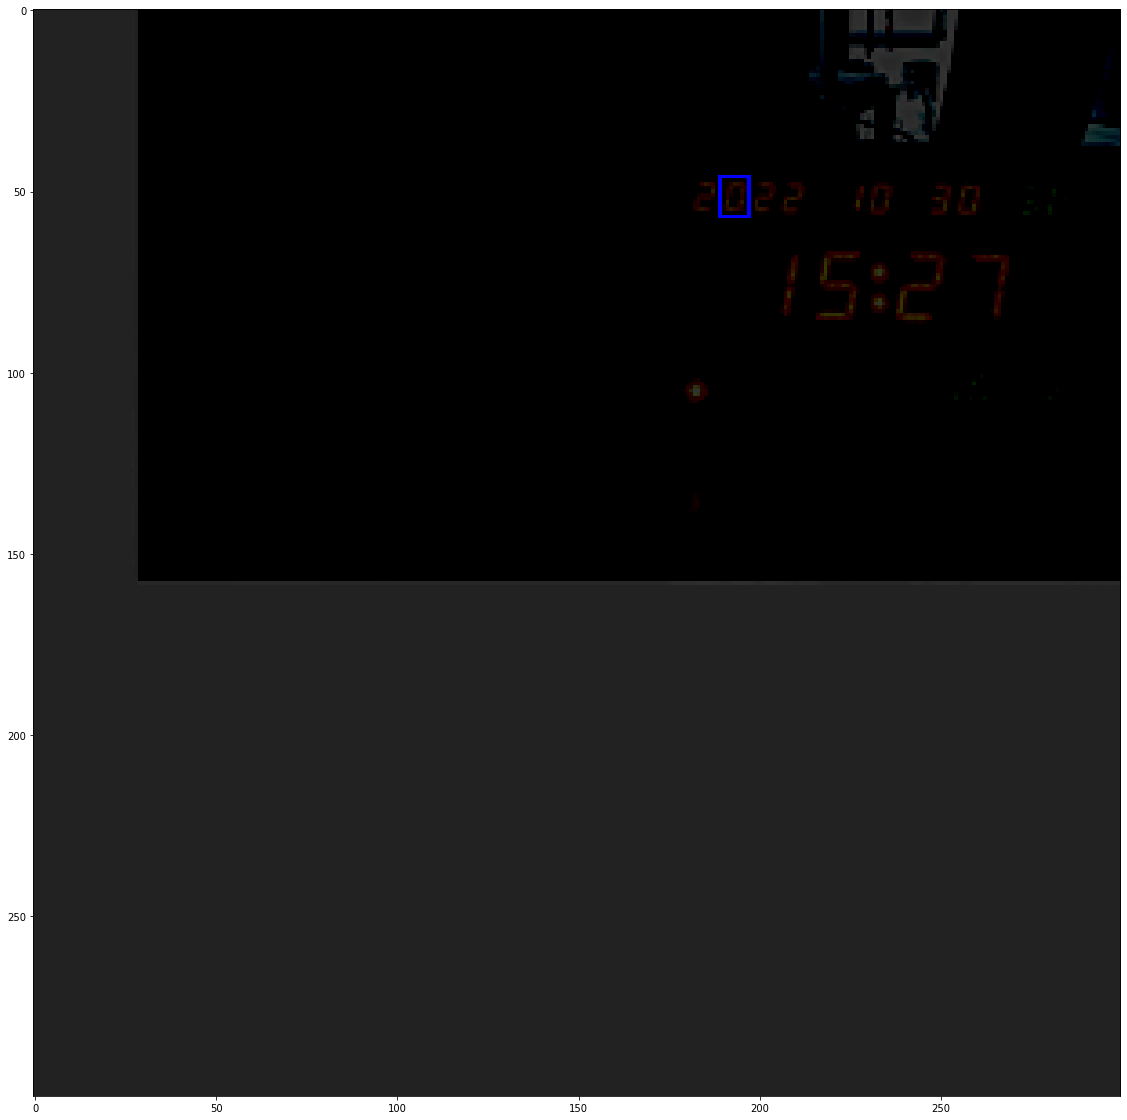

In [23]:
plt.figure(figsize=(20,20))
plt.imshow(output_img)

In [60]:
!python3 dataset.py

2022-11-17 08:10:41.422063: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-17 08:10:41.861287: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 88 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:65:00.0, compute capability: 7.5
Traceback (most recent call last):
  File "dataset.py", line 223, in <module>
    dataset = VOCDataset(data_anno_path, default_boxes, image_size, -1, idx_to_idx = labels)
TypeError: __init__() got an unexpected keyword argument 'idx_to_idx'


In [79]:
from network import create_ssd
from anchor import generate_default_boxes
from image_utils import padding, ImageVisualizer
from box_utils import decode, compute_nms

import tensorflow as tf
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

labels = ['0','1','2','3','4','5','6','7','8','9', '.']
num_classes = len(labels) + 1 
IMAGE_SIZE = 300

model = create_ssd(num_classes=num_classes, arch='ssd300', pretrained_type=None, checkpoint_path='/home/workspace/iot_ai_model/check_points/ssd-digit/ssd_epoch_latest.h5')
visualizer = ImageVisualizer(labels, save_dir='.')
config = {}
config['scales'] =  [0.07, 0.2, 0.375, 0.55, 0.725, 0.9, 1.075]
config['fm_sizes'] = [38, 19, 10, 5, 3, 1]
config['ratios'] = [[2], [2, 3], [2, 3], [2, 3], [2], [2]]
default_boxes = generate_default_boxes(config)

def detect(model, image_path):
    org_img = Image.open(image_path).convert('RGB')
    org_img, _ = padding(org_img)
    img = np.array(org_img.resize((IMAGE_SIZE, IMAGE_SIZE)), dtype=np.float32)
    img = (img / 127.0) - 1.0
    img = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
    confs, locs = model(img)
    
    plt.figure(figsize=(20, 20))
    plt.imshow(img[0] +0.6)
    
    confs = tf.squeeze(confs, 0)
    locs = tf.squeeze(locs, 0)

    confs = tf.math.softmax(confs, axis=-1)
    classes = tf.math.argmax(confs, axis=-1)
    scores = tf.math.reduce_max(confs, axis=-1)
    boxes = decode(default_boxes, locs)

    out_boxes = []
    out_labels = []
    out_scores = []

    for c in range(1, num_classes):
        cls_scores = confs[:, c]

        score_idx = cls_scores > 0.2

        # print((c-1), max(cls_scores))
        # cls_boxes = tf.boolean_mask(boxes, score_idx)
        # cls_scores = tf.boolean_mask(cls_scores, score_idx)
        cls_boxes = boxes[score_idx]
        cls_scores = cls_scores[score_idx]

        nms_idx = compute_nms(cls_boxes, cls_scores, 0.1, 200)
        cls_boxes = tf.gather(cls_boxes, nms_idx)
        cls_scores = tf.gather(cls_scores, nms_idx)
        cls_labels = [c] * cls_boxes.shape[0]

        out_boxes.append(cls_boxes)
        out_labels.extend(cls_labels)
        out_scores.append(cls_scores)

    out_boxes = tf.concat(out_boxes, axis=0)
    out_scores = tf.concat(out_scores, axis=0)

    boxes = tf.clip_by_value(out_boxes, 0.0, 1.0).numpy()
    classes = np.array(out_labels)
    scores = out_scores.numpy()
    
    boxes *= org_img.size * 2
    boxes = boxes.astype(dtype=np.int16)
    
    # visualizer.save_image(org_img, boxes, classes, '{:d}'.format(0))
    
    plt.figure(figsize=(20, 20))
    visualizer.plt_image(org_img, boxes, classes, '{:d}'.format(0))
    

loaded weight /home/workspace/iot_ai_model/check_points/ssd-digit/ssd_epoch_latest.h5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


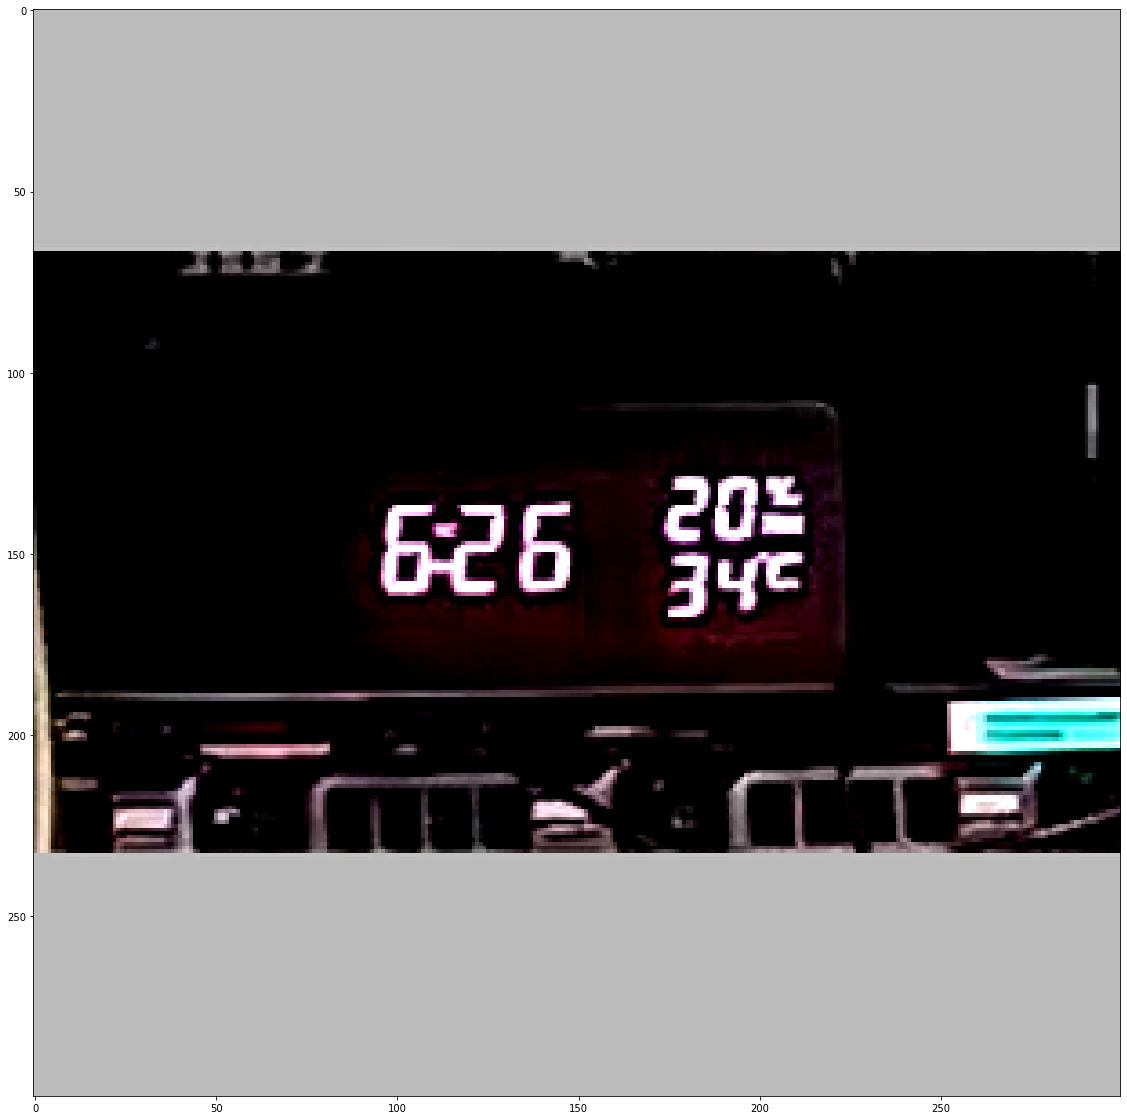

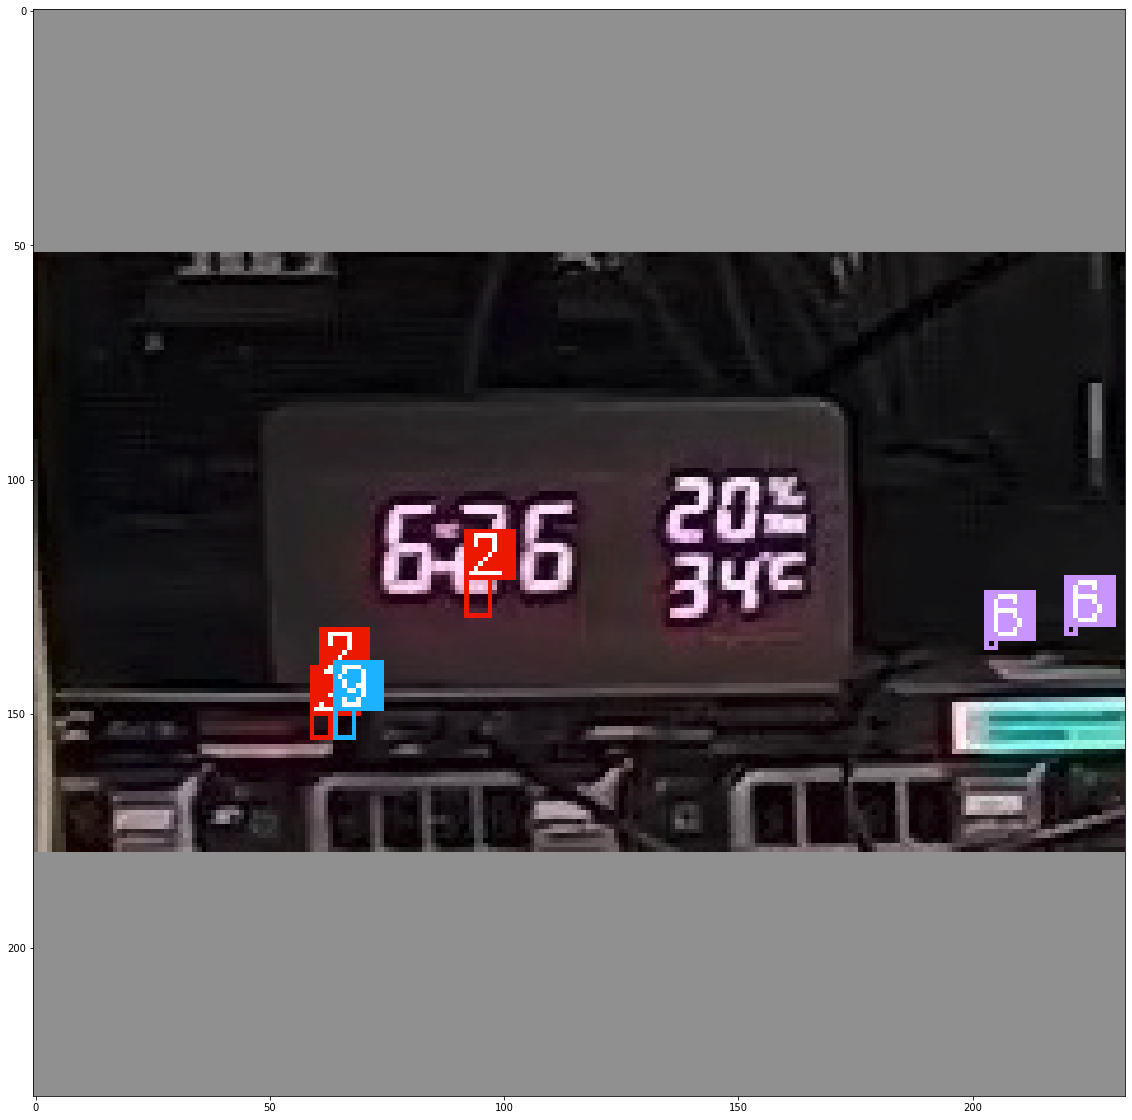

In [84]:
detect(model, '/home/workspace/iot_ai_model/dataset/digital_digit/test/test01.png')